In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

seaborn.set_style("whitegrid", {'axes.grid' : False})

Ny data dimensjon:
(30000, 3)


<IPython.core.display.Javascript object>


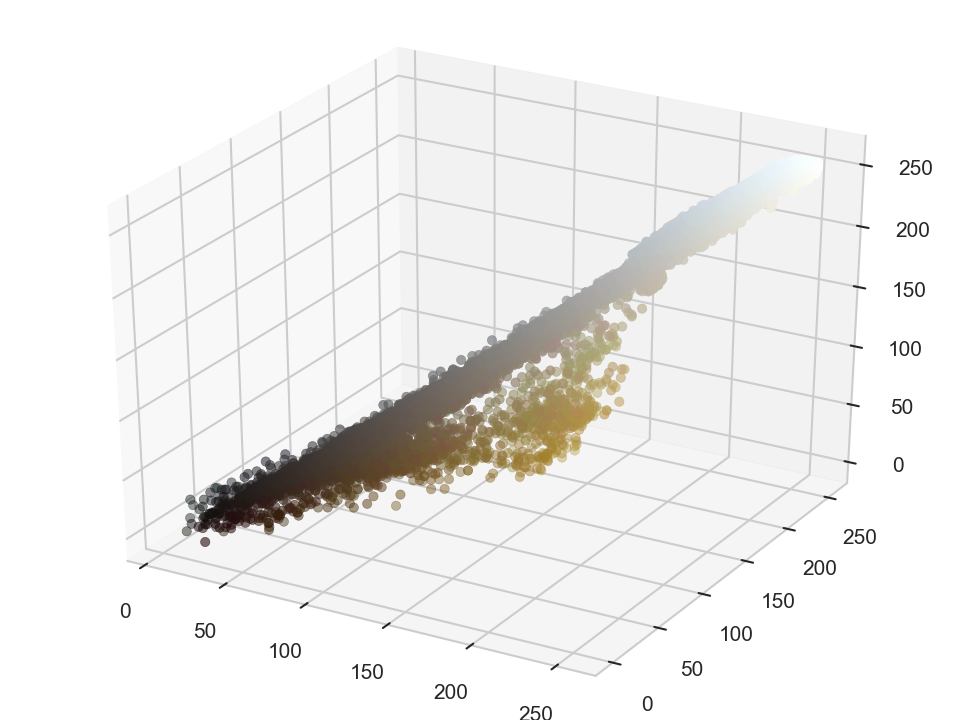

In [2]:
image = misc.imread('../datasets/bilder/cat2_small.jpeg')
w,h,_ = image.shape

features = np.reshape(image, (image.shape[0]*image.shape[1], image.shape[2]))
print("Ny data dimensjon:")
print(features.shape)


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(features[:,0], features[:,1], features[:,2],facecolors = features/255.)
plt.show()

In [3]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image


<IPython.core.display.Javascript object>


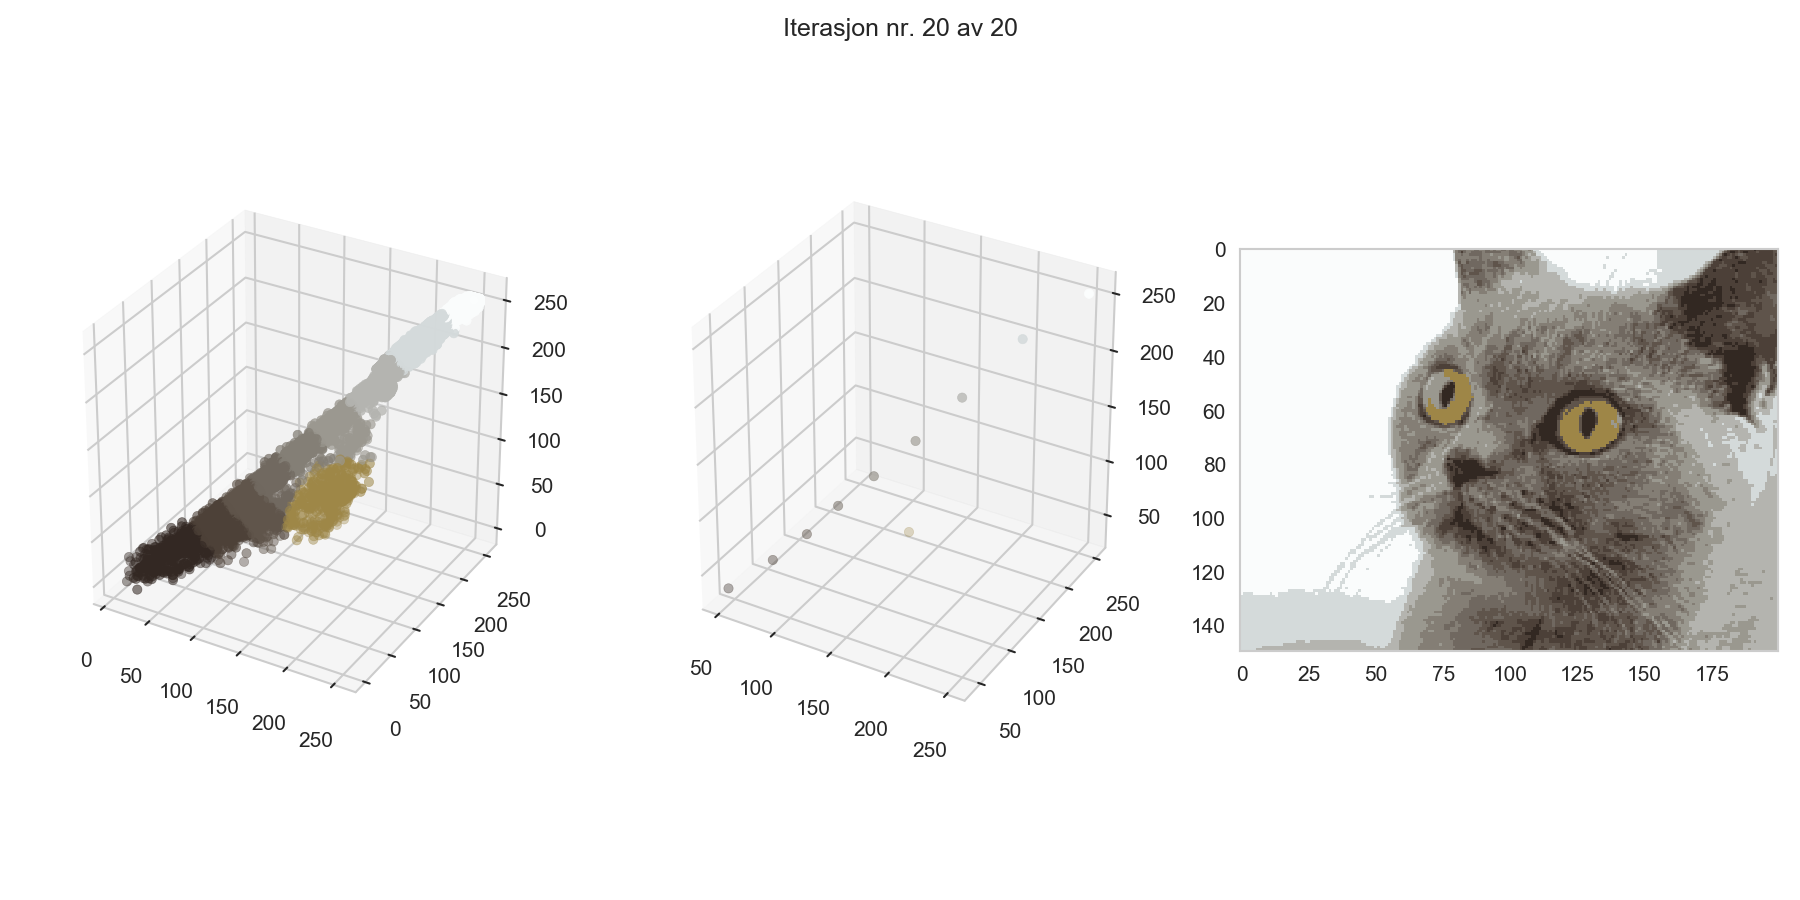

In [4]:
plt.rcParams['figure.figsize'] = (12, 6)
cc_new = np.load("../numpy_arrays/sample_init.npy")

fig = plt.figure()

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133)
ax1.set_aspect('equal')
ax2.set_aspect('equal')

plt.tight_layout()
num_its = 20
for i in range(num_its):
    if i ==0:
        kmeans = KMeans(n_clusters=10, random_state=10, max_iter=1, n_init=1,init=cc_new)
    else:
        
        kmeans = KMeans(n_clusters=10, random_state=10, max_iter=1, n_init=1, init=cc)
    kmeans.fit(features)
    
    
    cc = kmeans.cluster_centers_
    
    labels = kmeans.predict(features)
    
    new_image = recreate_image(cc, labels, w, h)/255.
    
    new_features = np.reshape(new_image, (image.shape[0]*image.shape[1], image.shape[2]))
    ax1.clear()
    s1 = ax1.scatter(features[:,0], features[:,1], features[:,2],facecolors = new_features)
    ax2.clear()
    s2 = ax2.scatter(cc[:,0], cc[:,1], cc[:,2],facecolors = cc/255.)
    ax2.view_init()
    
    ax1.view_init()
    
    ax3.imshow(new_image)
    plt.suptitle("Iterasjon nr. %d av %d" %(i+1,num_its))
    
    plt.tight_layout()
    fig.canvas.draw()
    
    
    #plt.show()

In [5]:

#r = np.random.rand(cc.shape[0],cc.shape[1])
#cc_new = (cc + r*a - 0.5*a)#*0.2
#np.save("clusters.npy",cc)

## TODO:
Kanskje plotte clustersenter, cluster og bilde i 1x3 subplot og oppdatere underveis heller enn å plotte under hverandre. 

Kanskje gamle clustersenter kan plottes med forsvinnende opacity